<a href="https://colab.research.google.com/github/Joshmen06/Knn_Nb_Project/blob/main/1_Knn_Nb_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [22]:
data = pd.read_csv("/content/ortho_knnnb.csv")

In [23]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [24]:
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (310, 7)
Number of rows in the dataset: 310
Number of columns in the dataset: 7


In [25]:
print("Column Names:",data.columns.values)

Column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [27]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


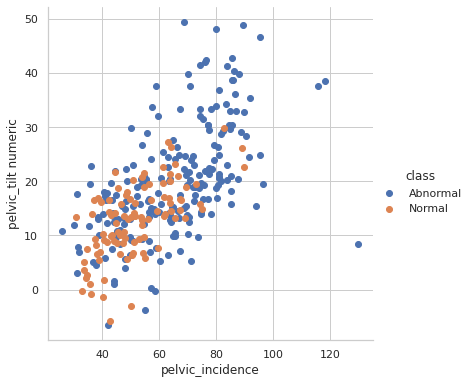

In [28]:
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="class", size=5.5) \
   .map(plt.scatter, "pelvic_incidence", "pelvic_tilt numeric") \
   .add_legend();
plt.show();

In [29]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [30]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [31]:
corr=data.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [32]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [33]:
df=data['class'].replace({'Abnormal':0,'Normal':1})

In [34]:
df.head(2)

0    0
1    0
Name: class, dtype: int64

In [35]:
X=data.drop(['class'],axis=1)

In [36]:
Y=df.values

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(248, 6)
(62, 6)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_accuracy=[]
for k in range(3,10):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  train_pred=knn.predict(X_train)
  train_score=accuracy_score(train_pred,Y_train)
  test_pred=knn.predict(X_test)
  test_score=(accuracy_score(test_pred,Y_test))
  print('Test Accuracy:',test_score,k)

Test Accuracy: 0.8548387096774194 3
Test Accuracy: 0.8387096774193549 4
Test Accuracy: 0.8387096774193549 5
Test Accuracy: 0.8387096774193549 6
Test Accuracy: 0.8387096774193549 7
Test Accuracy: 0.8387096774193549 8
Test Accuracy: 0.8225806451612904 9


In [41]:
# Training with naive bayes
from sklearn.naive_bayes import GaussianNB
nvbc=GaussianNB()
nvbc.fit(X_train,Y_train)
Y_pred=nvbc.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print('The Accuracy of NB is:',accuracy_score(Y_pred,Y_test))

The Accuracy of NB is: 0.7903225806451613


In [46]:
from sklearn.metrics import confusion_matrix
corr=confusion_matrix(Y_test,Y_pred)
corr

array([[37, 10],
       [ 3, 12]])